### TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Comment peut-on mesurer la vitesse du son ?
2. Comment isoler le signal émis par l'haut-parleur et comment peut-on minimiser les bruits captés par les microphones ?
3. Utiliser les différents signaux afin de déduire lequel est le plus qualitatif.

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip


traitesignfip.record_microphone("noise") #Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant 1 seconde

left,right = traitesignfip.read_signal('enregistrement.wav')

#La ligne ci-dessus permet de séparer les deux canaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro. (Tableaux 'left' et 'right')
```


# Code python permettant de réaliser la mesure du son

Temps PIC Gauche : 3.45734693877551
Temps PIC Droit : 3.464263038548753
Delta : 0.006916099773242923
Vitesse : 115.67213114753609 m/s


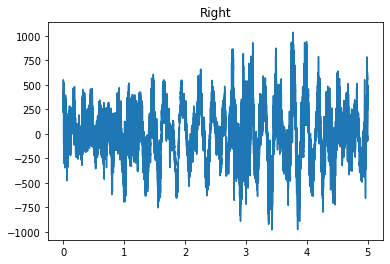

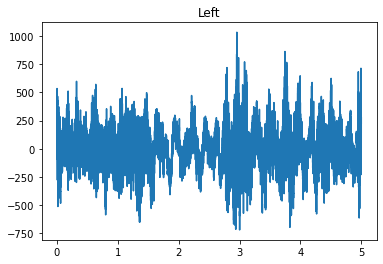

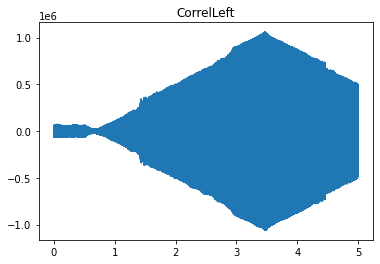

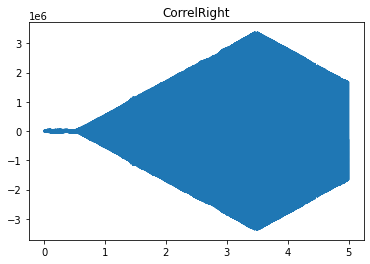

In [45]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record_microphone("sinus",3)

data_left, data_right = traitesignfip.read_signal('enregistrement.wav')

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.80#Distance entre les deux micros en mètre

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#Intercorrélation gauche 
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#Intercorrélation droite 

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = delta = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")


In [49]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)
vitesse_moyenne=0

for x in range(3):
    traitesignfip.record_microphone("clap",3)

    data_left, data_right = traitesignfip.read_signal('enregistrement.wav')

    fs = 44100 # fréquence d'échantillonage
    N=len(data_left) #nombre d'échantillions 
    n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

    distance=0.80#Distance entre les deux micros en mètre

    corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
    corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')
    # Calcul de la corrélation croisée entre les deux signaux

    # Trouver l'indice du maximum de la corrélation
    max_index_Left = np.argmax(corrLeft)/fs
    max_index_Right = np.argmax(corrRight)/fs

    delta_t = delta = np.abs(max_index_Left - max_index_Right)

    print("Temps PIC Gauche : "+str(max_index_Left))
    print("Temps PIC Droit : "+str(max_index_Right))

    print("Delta : "+str(delta_t))
    print("Vitesse : "+str(distance/delta_t)+" m/s")
    vitesse_moyenne+=distance/delta_t
print("Vitesse moyenne Noise 2 seconde : "+str(vitesse_moyenne/3))

Temps PIC Gauche : 2.506938775510204
Temps PIC Droit : 2.505578231292517
Delta : 0.0013605442176869431
Vitesse : 588.000000000057 m/s


ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


Temps PIC Gauche : 2.464784580498866
Temps PIC Droit : 2.4634240362811792
Delta : 0.0013605442176869431
Vitesse : 588.000000000057 m/s


ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


Temps PIC Gauche : 2.5065532879818595
Temps PIC Droit : 2.5045124716553286
Delta : 0.0020408163265308588
Vitesse : 391.99999999995265 m/s
Vitesse moyenne Noise 2 seconde : 522.6666666666889
